In [117]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [145]:
# define instruments to download
companies_dict = {
 'Amazon': 'AMZN',
 'Apple': 'AAPL',
 'Walgreen': 'WBA',
 'Northrop Grumman': 'NOC',
 'Boeing': 'BA',
 'Lockheed Martin':'LMT',
 'McDonalds': 'MCD',
 'Intel': 'INTC',
 'Navistar': 'NAV',
 'IBM': 'IBM',
 'Texas Instruments': 'TXN',
 'MasterCard': 'MA',
 'Microsoft': 'MSFT',
 'General Electric': 'GE',
 'Alphabet Inc. (Class C)': 'GOOG',
 'American Express': 'AXP',
 'Pepsi': 'PEP',
 'Coca Cola': 'KO',
 'Johnson & Johnson': 'JNJ',
 'Toyota': 'TM',
 'Honda': 'HMC',
 'Amgen Inc.': 'AMGN'
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [146]:
# import pandas as pd
# df=pd.read_csv('SP500_List.csv')

# localhost:5000/volatility_score?basket=AAPL, TSLA, BA

In [147]:
# df[df['GICS Sector']=='Industrials']['Symbol']

In [148]:
# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '2018-05-20'
end_date = '2021-05-20'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(panel_data.axes)

[DatetimeIndex(['2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-29', '2018-05-30', '2018-05-31',
               '2018-06-01', '2018-06-04',
               ...
               '2021-05-07', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None), MultiIndex([('Adj Close', 'AMZN'),
            ('Adj Close', 'AAPL'),
            ('Adj Close',  'WBA'),
            ('Adj Close',  'NOC'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'LMT'),
            ('Adj Close',  'MCD'),
            ('Adj Close', 'INTC'),
            ('Adj Close',  'NAV'),
            ('Adj Close',  'IBM'),
            ...
            (   'Volume', 'MSFT'),
            (   'Volume',   'GE'),
            (   'Volume', 'GOOG'),
            (   'Volume',  'AXP'),
            (   'Volume',  '

In [149]:
# Find Stock Open and Close Values
stock_close = panel_data['Close']
stock_open = panel_data['Open']


# df=panel_data.dropna()
# df=panel_data.isnull()

# print(stock_close)
print(stock_close.iloc[0])
# print(df)

Symbols
AMZN    1585.459961
AAPL      46.907501
WBA       64.500000
NOC      331.359985
BA       363.920013
LMT      324.279999
MCD      161.479996
INTC      54.320000
NAV       40.270000
IBM      145.490005
TXN      110.410004
MA       191.199997
MSFT      97.599998
GE        14.673077
GOOG    1079.579956
AXP      102.040001
PEP       99.510002
KO        42.410000
JNJ      123.720001
TM       136.449997
HMC       33.240002
AMGN     176.470001
Name: 2018-05-21 00:00:00, dtype: float64


In [150]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [151]:
for i in range(0, len(companies)):
 print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))

Company: Apple, Change: -893.142822265625
Company: Amgen Inc., Change: 25.352386474609375
Company: Amazon, Change: -5.609962463378906
Company: American Express, Change: -33.1900634765625
Company: Boeing, Change: -254.62032318115234
Company: General Electric, Change: -84.95919799804688
Company: Alphabet Inc. (Class C), Change: 14.800262451171875
Company: Honda, Change: 18.759937286376953
Company: IBM, Change: -30.75999355316162
Company: Intel, Change: 2.590179443359375
Company: Johnson & Johnson, Change: 40.990020751953125
Company: Coca Cola, Change: -42.24951171875
Company: Lockheed Martin, Change: 46.02985382080078
Company: MasterCard, Change: -9.337293148040771
Company: McDonalds, Change: 1128.1126098632812
Company: Microsoft, Change: 10.520095825195312
Company: Navistar, Change: 26.46002960205078
Company: Northrop Grumman, Change: -8.069995880126953
Company: Pepsi, Change: 7.830101013183594
Company: Toyota, Change: -42.560020446777344
Company: Texas Instruments, Change: -7.230005264

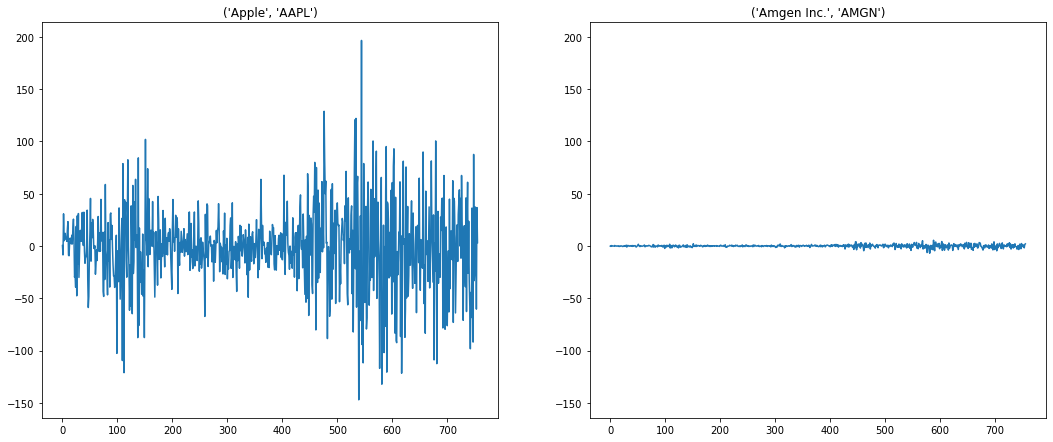

In [152]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [153]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.2593799644714481
-0.3688872772598865
-0.00016954954511011906


In [154]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=5, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [155]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=5))])

In [156]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                        companies
3        0          (American Express, AXP)
5        0           (General Electric, GE)
4        1                     (Boeing, BA)
15       1                (Microsoft, MSFT)
8        1                       (IBM, IBM)
11       1                  (Coca Cola, KO)
13       1                 (MasterCard, MA)
19       2                     (Toyota, TM)
2        2                   (Amazon, AMZN)
6        2  (Alphabet Inc. (Class C), GOOG)
9        2                    (Intel, INTC)
20       2         (Texas Instruments, TXN)
0        3                    (Apple, AAPL)
14       3                 (McDonalds, MCD)
10       3         (Johnson & Johnson, JNJ)
7        3                     (Honda, HMC)
1        3               (Amgen Inc., AMGN)
12       3           (Lockheed Martin, LMT)
16       4                  (Navistar, NAV)
17       4          (Northrop Grumman, NOC)
18       4                     (Pepsi, PEP)
21       4                  (Wal

In [157]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                        companies
10       0         (Johnson & Johnson, JNJ)
7        0                     (Honda, HMC)
11       0                  (Coca Cola, KO)
2        1                   (Amazon, AMZN)
9        1                    (Intel, INTC)
18       2                     (Pepsi, PEP)
17       2          (Northrop Grumman, NOC)
16       2                  (Navistar, NAV)
8        3                       (IBM, IBM)
14       4                 (McDonalds, MCD)
12       4           (Lockheed Martin, LMT)
0        4                    (Apple, AAPL)
1        4               (Amgen Inc., AMGN)
21       5                  (Walgreen, WBA)
13       6                 (MasterCard, MA)
15       6                (Microsoft, MSFT)
4        6                     (Boeing, BA)
5        7           (General Electric, GE)
3        7          (American Express, AXP)
19       8                     (Toyota, TM)
20       8         (Texas Instruments, TXN)
6        9  (Alphabet Inc. (Clas

<Figure size 432x288 with 0 Axes>

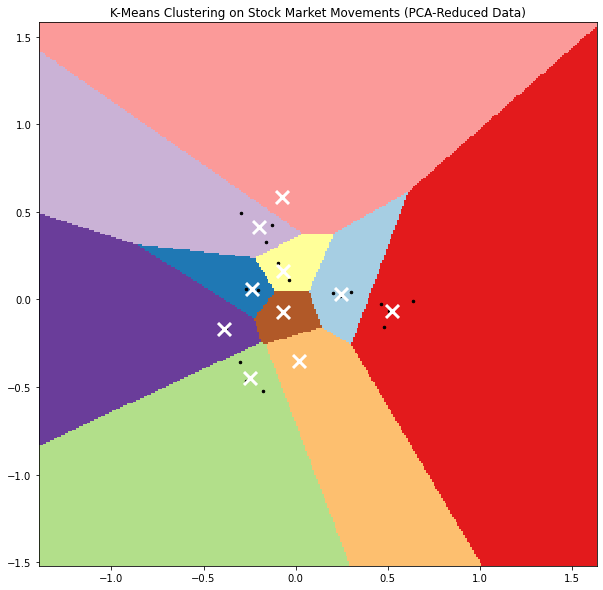

In [158]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()